In [ ]:
%pip install --upgrade --force-reinstall pillow

In [ ]:
# Import libraries needed for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the dataset
#df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/animal_data/Training_set_animals.csv')
df = pd.read_csv('data/pharmaData.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
print("No. of dimensions: ", df.ndim)
print("Shape of array: ", df.shape)
print("Size of array: ", df.size) # number of elements
print("Array stores elements of type: ", df.dtypes)

In [ ]:
# Convert date data to datetime type and set date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Check for distribution and skewness using plots

In [ ]:
for col in df.columns:
    sns.displot(df[col])
    plt.show()

In [ ]:
#Describe the data
df.describe()

# Advanced Statistics with Python
![CleanShot 2024-03-26 at 17.59.20.png](<attachment:CleanShot 2024-03-26 at 17.59.20.png>)
![CleanShot 2024-03-26 at 17.59.58.png](<attachment:CleanShot 2024-03-26 at 17.59.58.png>)
![CleanShot 2024-03-26 at 18.00.51.png](<attachment:CleanShot 2024-03-26 at 18.00.51.png>)
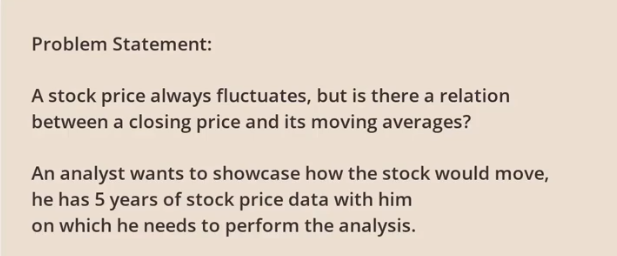
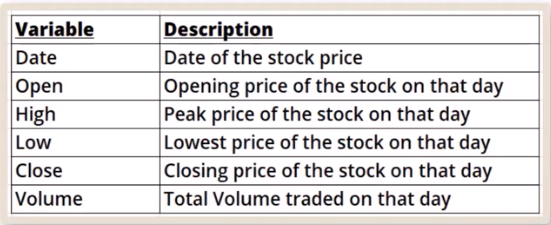
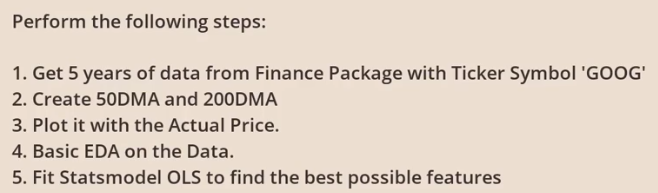

In [ ]:
# Install missing python packages
%pip install yfinance

In [ ]:
# Import libraries
import yfinance as yahooFinance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
google = yahooFinance.Ticker('GOOGL')

In [ ]:
# 5 years of data
df = google.history(period='5y')

In [ ]:
# Print the head of the data
df.head()

In [ ]:
# Print the tail of the data
df.tail()

In [ ]:
print("No. of dimensions: ", df.ndim)
print("Shape of array: ", df.shape)
print("Size of array: ", df.size) # number of elements
print("Array stores elements of type: ", df.dtypes)

In [ ]:
df.describe()

In [ ]:
# Overview of closing price before calculating DMAs
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi = 150)
plt.title('Closing Price of Google')
plt.plot(df['Close'], label = 'Close')

In the stock market, calculating a DMA with stock price data is a technical analysis tool that helps identify trends and support and resistance levels. DMA stands for **Displaced Moving Average**, and it's a variation of the Moving Average (MA) indicator. The DMA **calculates the average of a specific number of closing prices in the past and plots it at a specific number of bars back from the current price. This introduces a time lag, which can help smooth out short-term price fluctuations and provide a clearer view of the overall trend.**

In [ ]:
# Calculate 50 days moving average
df['fiftyDMA'] = df['Close'].rolling(window=50).mean()

In [ ]:
# Calculate 200 days moving average
df['thDMA'] = df['Close'].rolling(window=200).mean()

In [ ]:
df.describe()

In [ ]:
# Drop columns with no values including Dividends, and Stock Splits (which as only one value acroos the dataset)
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# Plot Closing price vs 50 and 200 days moving averages
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi = 150)
plt.title('Closing Price of Google vs 50DMA and 200DMA')
plt.plot(df['Close'], label = 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

## Inferences from the above graph
1. 50DMA and 200DMA are fairly good indicators of how the stock is moving
2. If the closing price is above the 50DMA or 200DMA, it is usually on the uptrend or bullish
3. If the closing price is below the 50DMA or 200DMA, it usually means that it is in a downward trend
4. Every point where 50DMA and 200DMA intersect, the market usually reverses is treand (High->Low | Low->High)
5. The dip at March 2020, indicates the Covid 19 market crash

## Finding the possible futuristic movement of the stock

In [ ]:
plt.figure(figsize=(7, 7), dpi = 100)
sns.heatmap(df.corr(), annot=True)

## Inferences from the heatmap
1. Closing price has very High correlation with almost all of the variables except the volume
2. There is strong multi collinearity between the variables as well

In [ ]:
# Plot distplot of 50DMA
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi = 150)
plt.title('Distplot 50DMA')
sns.distplot(df['fiftyDMA'])

In [ ]:
# Plot distplot of the close price
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi = 150)
plt.title('Distplot of Close Price')
sns.distplot(df['Close'])

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
model = smf.ols(formula = 'Close ~ fiftyDMA', data=df)
model = model.fit()

# Note that we didn't use 200 DMA even though it had very high correlation with Close price
# This is because 50 DMA and 200 DMA were closely related to each other as well.
# So we need to avoid multicollinearity when we are choosing features for our data set.

In [ ]:
model.summary()

## Inferences from the summary
1. Good R-squared and coef values
2. Since they are vey highly correlated, it isn't wise to fit the model based on the parameters in real life

The statement _"it isn't wise to fit the model based on the parameters in real life"_ likely refers to the caution against overfitting a model to your data. Overfitting occurs when a model is excessively complex, such as having too many parameters relative to the number of observations. A model that has been overfit will perform well on the training data because it's able to capture the noise along with the underlying pattern, but it may perform poorly on new, unseen data because it's too tailored to the training data.

In real-life scenarios, the goal is often to develop a model that can generalize well from the training data to unseen data. If a model is too closely fit to the parameters of the training data, it may not perform well when it encounters data that it hasn't seen before. This is why it's important to use techniques like cross-validation to validate the model's performance and avoid overfitting.

Moreover, in real-life scenarios, data can often be noisy and contain outliers. If a model is fit too closely to this data, it may capture the noise and outliers as if they were meaningful, leading to a model that makes inaccurate predictions.

Therefore, it's generally wise to fit the model in a way that finds a balance between bias (underfitting) and variance (overfitting), rather than fitting it too closely based on the parameters.

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 5), dpi = 150)
plt.title('Closing Price of Google vs 50DMA vs 200DMA')
plt.plot(df['Close'], label = 'Close')
plt.plot(df['fiftyDMA'], label = '50DMA')
plt.plot(df['thDMA'], label = '200DMA')
plt.legend()

## Inferences and Observations
   Let's assume our graph stopped around end of first quarter of 2022.  If we notice the graph, we can see that the closing price is below 50 DMA and 200 DMA.  This likely means that the price would go down further. But at the end we can notice that there was a steep increase which means the 200 and 50 DMA would change over time. There would be a little bit of resistance with respect to price. So it is unlikely that the price will fall very steeply.

   As we can see from the additional data from mid-2022 to the end of the first quarter of 2024, for the remainder of 2022 while there was a period of short price increase and decrease that was by a steep decline over the rest of 2022.  Note that as mentioned the 50 DMA did change as a result of the period of short incread and decrease fluxuations, but that was smoothed out in the 200 DMA line.

# SalesAnaysis Investigation

In [ ]:
df = pd.read_excel('filename.xlsx', sheet_name=1)  # Sheet index starts from 0